# Proyecto - Everardo Guerrero 

### Paso 1 - importación

In [133]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import numpy as np
import pandas as pd
from math import log
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from scipy import stats
from scipy.stats import ttest_1samp

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Paso 2 - Un poco de exploración

In [100]:
df = pd.read_csv('train.csv')

In [101]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:
df.shape

(1460, 81)

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [105]:
df.describe(include = 'object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### Paso 3 - creare una copia del df para maniipular la copia y no el original (un poco de control por si requiero algo del df original despues)

In [106]:
df2 = df.copy()

### Paso 4 - un poco de limpieza

In [107]:
nulls = df2.isnull().sum()
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [108]:
##lista de columnas a eliminar ya que el 75% o mas de los datos estan vacios

drop_cols = list(nulls[nulls>= df2.shape[0]*0.25].index)
drop_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [109]:
## eliminando las columnas 

df3=df2.drop(drop_cols,axis=1)

In [110]:
##confirmando que elimine las columnas que queria

nulls_2 = df3.isnull().sum()
nulls_2 = nulls_2[nulls_2 > 0].sort_values(ascending = False)
nulls_2

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [111]:
##rellenemos los valores nulos

for col in df3.columns:
    if df3[col].dtype == 'object':
        new_value = str(df3[col].mode()[0])
    else:
        new_value = float(df3[col].mode()[0])
    df3[col] = df3[col].fillna(new_value)

In [112]:
##validacion que no existen ya valores nulos

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [113]:
## validacion 2 de que no existan nulls

df3.isnull().sum().sum()

0

In [114]:
corre = df3[df3.columns[:]].corr()['SalePrice'][:].sort_values(ascending=False)
corre

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.397778
BsmtFinSF1       0.386420
LotFrontage      0.329220
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [115]:
drop_cols2 = list(corre[corre<0.5].index)
print(drop_cols2)

['MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']


In [116]:
df4=df3.drop(drop_cols2,axis=1)

In [117]:
#validaicon de que solo deje las columnas con una correlación "representativa" 

df4[df4.columns[:]].corr()['SalePrice'][:].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [118]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0


In [143]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  YearBuilt      1460 non-null   int64 
 14  YearRemodAdd   1460 non-null   int64 
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

### Variables categoricas

In [199]:
columnas_nuevas = [x for x in df4 if x in df4.select_dtypes(include=['int64','float64'])]
df5 = df4[columnas_nuevas]
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   GrLivArea     1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   GarageArea    1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


### Deep dive

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


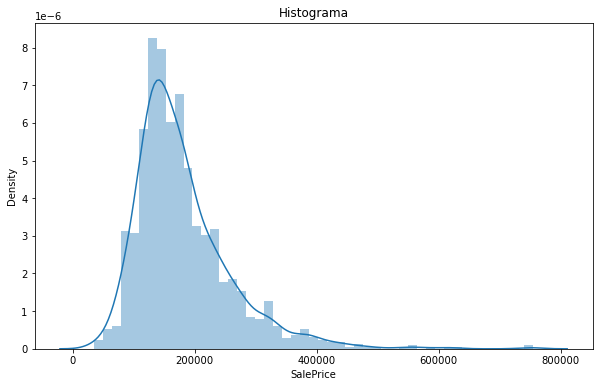

In [200]:
plt.figure(figsize=(10,6))
sns.distplot(df5.loc[:, 'SalePrice'],kde=True)
plt.title('Histograma');

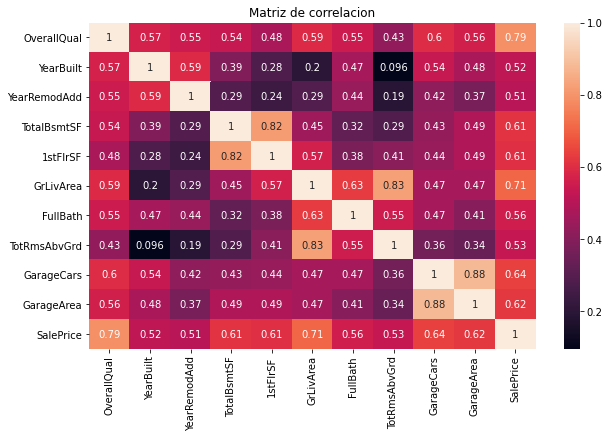

In [201]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df5.corr(), annot=True)
plt.title('Matriz de correlacion')
plt.show()

In [202]:
mu = df5['SalePrice']
garage = df5['SalePrice'][df4['GarageCars'] > 0]
full_bath = df5['SalePrice'][df4['FullBath'] > 1]

print(f'Promedio del precio de venta de todas las casas: {mu.mean()}')
print(f'Promedio del precio de venta de todas las casas con Garage: {garage.mean()}')
print(f'Promedio del precio de venta de todas las casas con Full_bath: {full_bath.mean()}')

Promedio del precio de venta de todas las casas: 180921.19589041095
Promedio del precio de venta de todas las casas con Garage: 185479.511240029
Promedio del precio de venta de todas las casas con Full_bath: 218563.92259675407


Text(0.085, 0.5, 'SalePrice')

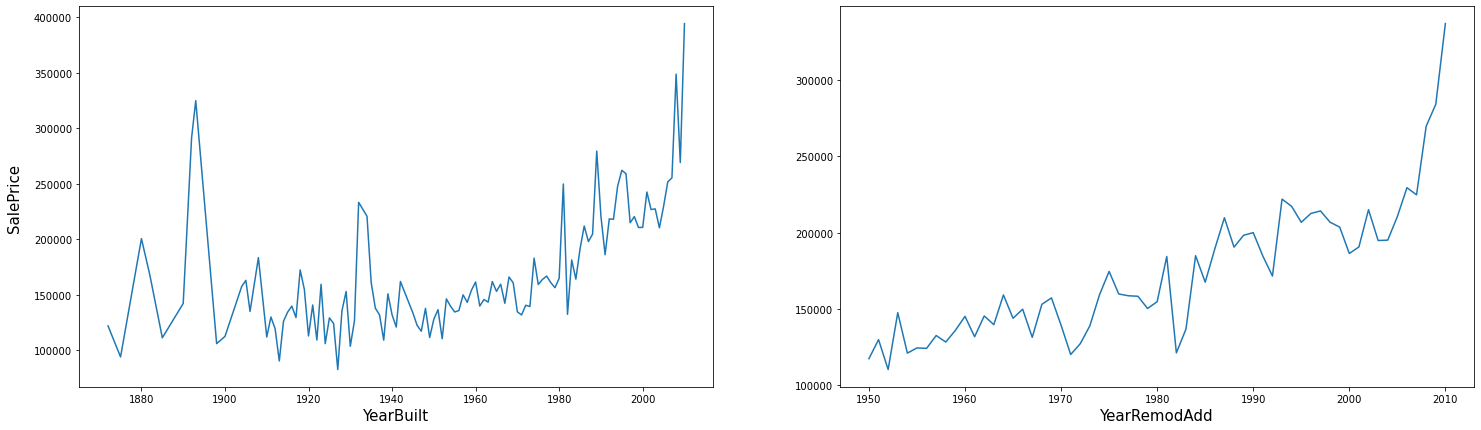

In [203]:
#Gráfica de precio vs. año en el que seconstruyó y remodeló (respectivamente)
plot_cols = ['YearBuilt', 'YearRemodAdd']

fig, ax = plt.subplots(1,2, figsize=(25, 7), sharex=False, sharey=False)

for i in range(len(plot_cols)):
    ax[i].plot(df5.groupby(plot_cols[i]).agg({'SalePrice':'mean'}))
    ax[i].set_xlabel(plot_cols[i], size=15)

fig.text(0.085, 0.5, 'SalePrice', va='center', rotation='vertical', size=15)

### Probando hipotesis 1

In [204]:
houses = df5['SalePrice']
new_houses = df5['SalePrice'][df5['YearBuilt'] > 2000]
old_houses = df5['SalePrice'][df5['YearBuilt'] <= 2000]

In [205]:
avg_houses = df5['SalePrice'].mean()
avg_new_houses = df5['SalePrice'][df5['YearBuilt'] > 2000].mean()
avg_old_houses = df5['SalePrice'][df5['YearBuilt'] <= 2000].mean()

In [206]:
avg_houses

180921.19589041095

In [207]:
avg_new_houses

244527.4587912088

In [208]:
avg_old_houses

159796.48813868614

In [209]:
ttest_1samp(new_houses, avg_houses)

Ttest_1sampResult(statistic=14.355483959121226, pvalue=2.507786734007074e-37)

In [210]:
t, p = stats.ttest_1samp(new_houses, avg_houses)
alpha = 0.05

if p < alpha:
    print(f'El valor de p es {p}, menor que {alpha}. \nRechazamos la hipótesis nula: el que una casa sea nueva '
          f'SÍ influye significativamente en su precio.')
else:
    print(f'El valor de p es {p}, mayor que {alpha}. \nNo rechazamos la hipótesis nula: el que una casa sea nueva '
          f'NO influye significativamente en su precio.')


El valor de p es 2.507786734007074e-37, menor que 0.05. 
Rechazamos la hipótesis nula: el que una casa sea nueva SÍ influye significativamente en su precio.


In [211]:
t, p = stats.ttest_1samp(old_houses, avg_houses)
alpha = 0.05

if p < alpha:
    print(f'El valor de p es {p}, menor que {alpha}. \nRechazamos la hipótesis nula: el que una casa sea vieja '
          f'SÍ influye significativamente en su precio.')
else:
    print(f'El valor de p es {p}, mayor que {alpha}. \nNo rechazamos la hipótesis nula: el que una casa sea vieja '
          f'NO influye significativamente en su precio.')

El valor de p es 1.3178299270166225e-25, menor que 0.05. 
Rechazamos la hipótesis nula: el que una casa sea vieja SÍ influye significativamente en su precio.


### Probando hipotesis 2

In [212]:
houses = df5['SalePrice']
Remodelacion_nueva = df5['SalePrice'][df5['YearRemodAdd'] > 2000]
Remodelacion_vieja = df5['SalePrice'][df5['YearRemodAdd'] <= 2000]

In [213]:
t, p = stats.ttest_1samp(Remodelacion_nueva, avg_houses)
alpha = 0.05

if p < alpha:
    print(f'El valor de p es {p}, menor que {alpha}. \nRechazamos la hipótesis nula: el que una casa con una remodelacion mas reciente '
          f'SÍ influye significativamente en su precio.')
else:
    print(f'El valor de p es {p}, mayor que {alpha}. \nNo rechazamos la hipótesis nula: el que una casa con una remodelacion mas reciente '
          f'NO influye significativamente en su precio.')


El valor de p es 1.2537102326749765e-23, menor que 0.05. 
Rechazamos la hipótesis nula: el que una casa con una remodelacion mas reciente SÍ influye significativamente en su precio.


In [214]:
t, p = stats.ttest_1samp(Remodelacion_vieja, avg_houses)
alpha = 0.05

if p < alpha:
    print(f'El valor de p es {p}, menor que {alpha}. \nRechazamos la hipótesis nula: el que una casa con una remodelacion mas antigua '
          f'SÍ influye significativamente en su precio.')
else:
    print(f'El valor de p es {p}, mayor que {alpha}. \nNo rechazamos la hipótesis nula: el que una casa con una remodelacion mas antigua '
          f'NO influye significativamente en su precio.')


El valor de p es 1.143589307404794e-22, menor que 0.05. 
Rechazamos la hipótesis nula: el que una casa con una remodelacion mas antigua SÍ influye significativamente en su precio.


### Predicciones

In [215]:
y = df5['SalePrice'].reset_index(drop = True)
x = df5.drop('SalePrice',axis=1)

In [220]:
modelo = sm.OLS(y, x).fit()
predicciones = df5['SalePrice'] 
print_modelo = model.summary()
print(print_modelo)

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              3603.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:46:57   Log-Likelihood:                         -17501.
No. Observations:                1460   AIC:                                  3.502e+04
Df Residuals:                    1450   BIC:                                  3.507e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [233]:
predi = modelo.predict(x)
coeff_ols = modelo.params
train_score = modelo.rsquared

In [234]:
df_pred = pd.DataFrame({'Actual':y,'Predicted':predi,'Dif':predi-y})
df_pred

,Actual,Predicted,Dif
0,208500,206777.035507,-1722.964493
1,181500,178480.629524,-3019.370476
2,223500,215553.600999,-7946.399001
3,140000,218902.917780,78902.917780
4,250000,280677.871590,30677.871590
...,...,...,...
1455,175000,183288.563932,8288.563932
1456,210000,229665.570640,19665.570640
1457,266500,222087.900249,-44412.099751
1458,142125,117854.207121,-24270.792879


In [238]:
## me da un r2 de 0.961 por lo cual eSTA COOL EL RESULTADO